In [5]:
install.packages("tidyverse")
install.packages("rpart")
install.packages("rpart.plot")
install.packages("caret")
install.packages("ModelMetrics")
install.packages("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘labelled’, ‘broom.helpers’, ‘patchwork’, ‘ggstats’




In [43]:
install.packages("knitr")
install.packages("C50")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘libcoin’, ‘mvtnorm’, ‘Formula’, ‘inum’, ‘Cubist’, ‘partykit’




In [8]:
library(tidyverse)
library(rpart)
library(rpart.plot)
library(caret)
library(ModelMetrics)
library(GGally)

In [44]:
library(e1071)
library(knitr)
library(C50)

In [11]:
data <- read.csv("/content/ObesityDataSet.csv")
head(data)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,Female,21,1.62,64.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
2,Female,21,1.52,56.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
3,Male,23,1.80,77.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
4,Male,27,1.80,87.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
5,Male,22,1.78,89.8,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
6,Male,29,1.62,53.0,no,yes,2,3,Sometimes,no,2,no,0,0,Sometimes,Automobile,Normal_Weight


In [12]:
traindata <- read.csv("/content/train.csv")
testdata <- read.csv("/content/test.csv")

In [13]:
colSums(is.na(traindata))
colSums(is.na(testdata))

id                         Gender 
                             0                              0 
                           Age                         Height 
                             0                              0 
                        Weight family_history_with_overweight 
                             0                              0 
                          FAVC                           FCVC 
                             0                              0 
                           NCP                           CAEC 
                             0                              0 
                         SMOKE                           CH2O 
                             0                              0 
                           SCC                            FAF 
                             0                              0 
                           TUE                           CALC 
                             0                              0 
                        MTRANS                     NObeyesdad 
                             0                              0

id                         Gender 
                             0                              0 
                           Age                         Height 
                             0                              0 
                        Weight family_history_with_overweight 
                             0                              0 
                          FAVC                           FCVC 
                             0                              0 
                           NCP                           CAEC 
                             0                              0 
                         SMOKE                           CH2O 
                             0                              0 
                           SCC                            FAF 
                             0                              0 
                           TUE                           CALC 
                             0                              0 
                        MTRANS 
                             0

In [14]:
str(data)
str(testdata)

'data.frame':	2111 obs. of  17 variables:
 $ Gender                        : chr  "Female" "Female" "Male" "Male" ...
 $ Age                           : num  21 21 23 27 22 29 23 22 24 22 ...
 $ Height                        : num  1.62 1.52 1.8 1.8 1.78 1.62 1.5 1.64 1.78 1.72 ...
 $ Weight                        : num  64 56 77 87 89.8 53 55 53 64 68 ...
 $ family_history_with_overweight: chr  "yes" "yes" "yes" "no" ...
 $ FAVC                          : chr  "no" "no" "no" "no" ...
 $ FCVC                          : num  2 3 2 3 2 2 3 2 3 2 ...
 $ NCP                           : num  3 3 3 3 1 3 3 3 3 3 ...
 $ CAEC                          : chr  "Sometimes" "Sometimes" "Sometimes" "Sometimes" ...
 $ SMOKE                         : chr  "no" "yes" "no" "no" ...
 $ CH2O                          : num  2 3 2 2 2 2 2 2 2 2 ...
 $ SCC                           : chr  "no" "yes" "no" "no" ...
 $ FAF                           : num  0 3 2 2 0 0 1 3 1 1 ...
 $ TUE                          

The test data does not contain the "NObeyesdad" column which shows wether a person is classified as obese or not

In [15]:
#Converting to factors

for (i in c("Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC", "MTRANS", "CAEC", "CALC", "NObeyesdad")) {
  traindata[[i]] <- as.factor(traindata[[i]])
  data[[i]] <- as.factor(data[[i]])
}
for (i in c("Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC", "MTRANS", "CAEC", "CALC")) {
  testdata[[i]] <- as.factor(testdata[[i]])
}


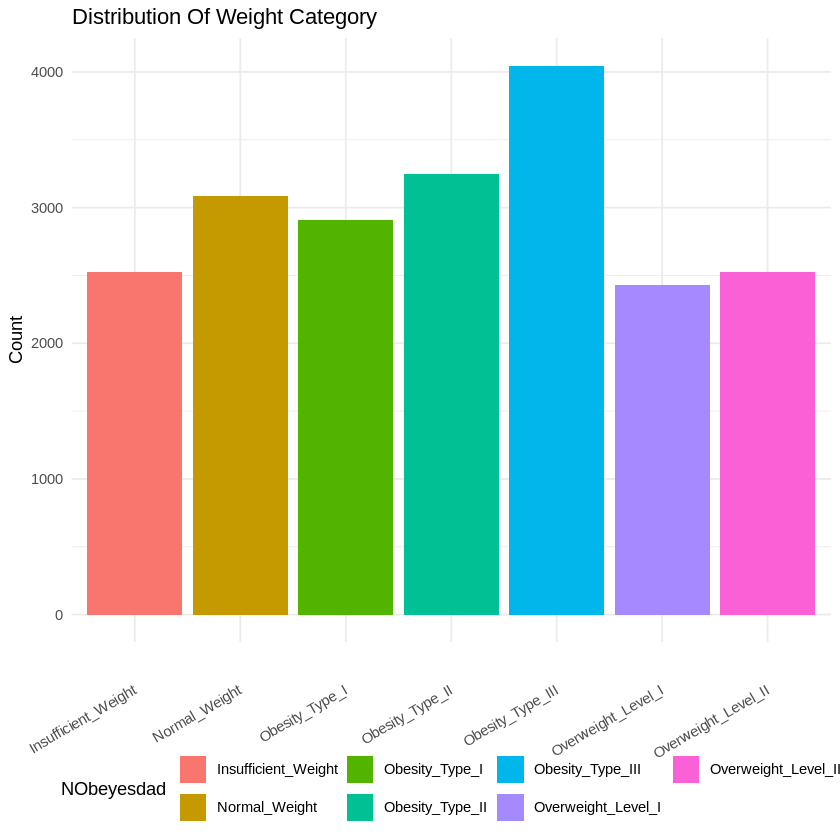

In [16]:
ggplot(traindata, aes(x = NObeyesdad, fill = NObeyesdad)) +
  geom_bar() +
  labs(title = "Distribution Of Weight Category",
       x = "NObeyesdad",
       y = "Count")+
theme_minimal()+
theme(axis.text.x = element_text(angle = 30, vjust = 0.5, hjust=1),
axis.title.x = element_blank(),
legend.position = "bottom")

In [17]:
round(prop.table(table(traindata$NObeyesdad)),2)


Insufficient_Weight       Normal_Weight      Obesity_Type_I     Obesity_Type_II 
               0.12                0.15                0.14                0.16 
   Obesity_Type_III  Overweight_Level_I Overweight_Level_II 
               0.19                0.12                0.12 

In [36]:
set.seed(124)
idx<-createDataPartition(traindata$NObeyesdad,p=0.7,list=F)

In [37]:
train_split<-traindata[idx,-1]
val_split<-traindata[-idx,-1]

**Decision Tree using rpart**


*   Accuracy = 83.53%



In [38]:
decision_tree <- rpart(NObeyesdad~.,data=train_split,method="class")

Warning message:
“All boxes will be white (the box.palette argument will be ignored) because
the number of classes in the response 7 is greater than length(box.palette) 6.
To silence this warning use box.palette=0 or trace=-1.”


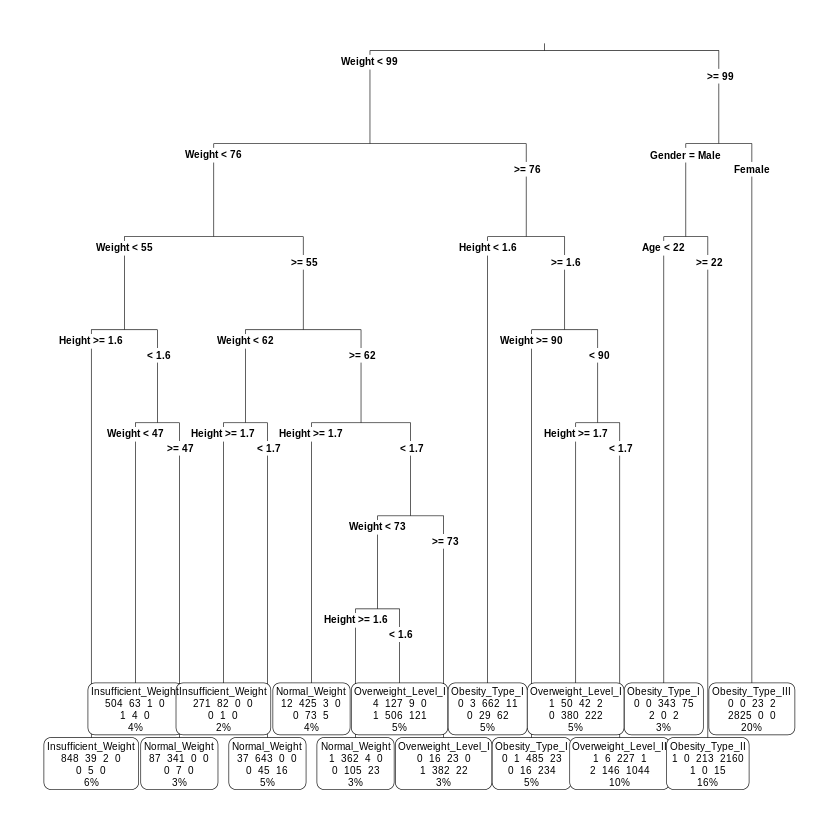

In [78]:
rpart.plot(decision_tree, type = 3, extra = 101, fallen.leaves = TRUE, cex = 0.5)

In [53]:
pred <- predict(decision_tree,val_split,type = "class")


In [42]:
caret::confusionMatrix(pred,data=val_split$NObeyesdad)

Confusion Matrix and Statistics

                     Reference
Prediction            Insufficient_Weight Normal_Weight Obesity_Type_I
  Insufficient_Weight                 698            55              0
  Normal_Weight                        83           755              0
  Obesity_Type_I                        0             1            653
  Obesity_Type_II                       0             0             49
  Obesity_Type_III                      0             0              1
  Overweight_Level_I                    6           124             15
  Overweight_Level_II                   0            18            118
                     Reference
Prediction            Obesity_Type_II Obesity_Type_III Overweight_Level_I
  Insufficient_Weight               0                0                  3
  Normal_Weight                     0                0                 82
  Obesity_Type_I                   95                5                 36
  Obesity_Type_II                 920    

**Decision Tree using C50**

*  Accuracy = 87.64%



In [49]:
decision_tree2 <- C5.0.default(train_split[-17], train_split$NObeyesdad)

In [52]:
pred2 <- predict(decision_tree2,val_split)


In [51]:
caret::confusionMatrix(pred2,data=val_split$NObeyesdad)

Confusion Matrix and Statistics

                     Reference
Prediction            Insufficient_Weight Normal_Weight Obesity_Type_I
  Insufficient_Weight                 706            46              0
  Normal_Weight                        75           763              3
  Obesity_Type_I                        0             5            763
  Obesity_Type_II                       0             0             27
  Obesity_Type_III                      0             1              1
  Overweight_Level_I                    7            97             24
  Overweight_Level_II                   3            18             58
                     Reference
Prediction            Obesity_Type_II Obesity_Type_III Overweight_Level_I
  Insufficient_Weight               1                0                  2
  Normal_Weight                     0                0                 72
  Obesity_Type_I                   37                4                 12
  Obesity_Type_II                 936    

**Boosted C5.0 decision tree with 100 trials**

*   Accuracy = 89.97 %





In [73]:
decision_tree2_boost <- C5.0.default(train_split[-17], train_split$NObeyesdad, trials = 100)

In [74]:
pred3 <- predict(decision_tree2_boost,val_split)

In [75]:
caret::confusionMatrix(pred3,data=val_split$NObeyesdad)

Confusion Matrix and Statistics

                     Reference
Prediction            Insufficient_Weight Normal_Weight Obesity_Type_I
  Insufficient_Weight                 709            43              1
  Normal_Weight                        58           807              1
  Obesity_Type_I                        0             2            766
  Obesity_Type_II                       0             0             23
  Obesity_Type_III                      0             0              1
  Overweight_Level_I                    6            73             15
  Overweight_Level_II                   0            18             45
                     Reference
Prediction            Obesity_Type_II Obesity_Type_III Overweight_Level_I
  Insufficient_Weight               0                0                  2
  Normal_Weight                     0                0                 50
  Obesity_Type_I                   34                3                 14
  Obesity_Type_II                 944    